# Parent network

This part is the whole training process for parent network.

We start with a pre-trained based CNN (VGG 16) for image labeling on Imagenet, its results in terms of segmentation, although confirm with some image features, are not useful. We download the pre-trained VGG 16 checkpoints from Google's TF model zoo directly, as our base network.

Then we train our parent network on the training set of DAVIS, the whole process and tensorboard graph are shown below.

In [ ]:
import os
os.kill(os.getpid(), 9)

In [ ]:
%tensorflow_version 1.13

`%tensorflow_version` only switches the major version: 1.x or 2.x.
You set: `1.13`. This will be interpreted as: `1.x`.


TensorFlow 1.x selected.


In [ ]:
import tensorflow as tf
tf.__version__

'1.15.2'

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!unzip -q '/content/drive/My Drive/models.zip' -d '/content'

In [ ]:
!unzip -q '/content/drive/My Drive/DAVIS.zip' -d '/content'

### Load Data


In [ ]:
from data_parent import load_data_parent

train_list = 'train_parent.txt'
dataset = load_data_parent(train_list, './DAVIS')

Start loading files:
Loading the data.........................................
Finish loading Dataset


### Train

In [ ]:
import os
import sys


slim = tf.contrib.slim

# Import OSVOS files
# root_folder = os.path.dirname(os.path.realpath('__file__'))
# sys.path.append(os.path.abspath(root_folder))
import cnn
from train_parent import train_parent


# Training parameters
gpu_id = 0
imagenet_ckpt = 'models/vgg_16.ckpt' #load vgg_16 checkpoints
logs_path = os.path.join('content', 'models', 'OSVOS_parent')
store_memory = True
data_aug = True
iter_mean_grad = 10
max_training_iters_1 = 15000
max_training_iters_2 = 30000
max_training_iters_3 = 50000
save_step = 5000
test_image = None
display_step = 100
ini_learning_rate = 1e-8
boundaries = [10000, 15000, 25000, 30000, 40000]
values = [ini_learning_rate, ini_learning_rate * 0.1, ini_learning_rate, ini_learning_rate * 0.1, ini_learning_rate,
          ini_learning_rate * 0.1]


# Train the network
with tf.Graph().as_default():
    with tf.device('/gpu:' + str(gpu_id)):
        global_step = tf.Variable(0, name='global_step', trainable=False)
        learning_rate = tf.train.piecewise_constant(global_step, boundaries, values)
        train_parent(dataset, imagenet_ckpt, 1, learning_rate, logs_path, max_training_iters_1, save_step,
                           display_step, global_step, iter_mean_grad=iter_mean_grad, test_image_path=test_image,
                           ckpt_name='OSVOS_parent')

with tf.Graph().as_default():
    with tf.device('/gpu:' + str(gpu_id)):
        global_step = tf.Variable(max_training_iters_1, name='global_step', trainable=False)
        learning_rate = tf.train.piecewise_constant(global_step, boundaries, values)
        train_parent(dataset, imagenet_ckpt, 2, learning_rate, logs_path, max_training_iters_2, save_step,
                           display_step, global_step, iter_mean_grad=iter_mean_grad, resume_training=True,
                           test_image_path=test_image, ckpt_name='OSVOS_parent')

with tf.Graph().as_default():
    with tf.device('/gpu:' + str(gpu_id)):
        global_step = tf.Variable(max_training_iters_2, name='global_step', trainable=False)
        learning_rate = tf.train.piecewise_constant(global_step, boundaries, values)
        train_parent(dataset, imagenet_ckpt, 3, learning_rate, logs_path, max_training_iters_3, save_step,
                           display_step, global_step, iter_mean_grad=iter_mean_grad, resume_training=True,
                           test_image_path=test_image, ckpt_name='OSVOS_parent')


The TensorFlow contrib module will not be included in TensorFlow 2.0.
For more information, please see:
  * https://github.com/tensorflow/community/blob/master/rfcs/20180907-contrib-sunset.md
  * https://github.com/tensorflow/addons
  * https://github.com/tensorflow/io (for I/O related ops)
If you depend on functionality not listed there, please file an issue.






Instructions for updating:
Please use `layer.__call__` method instead.
Instructions for updating:
Deprecated in favor of operator or tf.math.divide.









Init variable



Initializing from pre-trained imagenet model...
INFO:tensorflow:Restoring parameters from models/vgg_16.ckpt


Weights initialized
Start training


2020-12-17 18:45:36.690173 Iter 100: Training Loss = 142776.4375
2020-12-17 18:46:45.835564 Iter 200: Training Loss = 28640.6367
2020-12-17 18:47:55.052296 Iter 300: Training Loss = 20677.1602
2020-12-17 18:49:04.174395 Iter 400: Training Loss = 47989.8047
2020-12-17 18:50:13.248912 Iter 500: Training Loss = 30719.4141
2020-12-17 18:51:22.315558 Iter 600: Training Loss = 102048.6484
2020-12-17 18:52:31.372021 Iter 700: Training Loss = 51025.9414
2020-12-17 18:53:40.578181 Iter 800: Training Loss = 88319.5703
2020-12-17 18:54:49.614685 Iter 900: Training Loss = 19734.1406
2020-12-17 18:55:58.674548 Iter 1000: Training Loss = 65017.1172
2020-12-17 18:57:07.741465 Iter 1100: Training Loss = 86297.1094
2020-12-17 18:58:15.475221 Iter 1200: Training Loss = 114169.0312
2020-12-17 18:59:24.533778 Iter 1300: Training Loss = 31991.0000
2020-12-17 19:00:33.512690 Iter 1400: Training Loss = 17965.7930
2020-12-17 19:01:42.458968 Iter 1500: Training Loss = 22162.0508
2020-12-17 19:02:51.415324 Iter

INFO:tensorflow:content/models/OSVOS_parent/OSVOS_parent.ckpt-5000 is not in all_model_checkpoint_paths. Manually adding it.
Model saved in file: content/models/OSVOS_parent/OSVOS_parent.ckpt-5000


2020-12-17 19:43:00.617011 Iter 5100: Training Loss = 48708.2109
2020-12-17 19:44:09.743783 Iter 5200: Training Loss = 25184.1191
2020-12-17 19:45:19.024105 Iter 5300: Training Loss = 128353.5781
2020-12-17 19:46:28.242654 Iter 5400: Training Loss = 16186.0596
2020-12-17 19:47:37.424361 Iter 5500: Training Loss = 69383.0469
2020-12-17 19:48:46.587383 Iter 5600: Training Loss = 28882.8066
2020-12-17 19:49:54.698136 Iter 5700: Training Loss = 16919.5645
2020-12-17 19:51:03.489644 Iter 5800: Training Loss = 17432.4395
2020-12-17 19:52:12.654309 Iter 5900: Training Loss = 50807.2148
2020-12-17 19:53:21.776342 Iter 6000: Training Loss = 26908.0156
2020-12-17 19:54:30.918916 Iter 6100: Training Loss = 20501.0586
2020-12-17 19:55:40.151615 Iter 6200: Training Loss = 31064.3125
2020-12-17 19:56:49.351853 Iter 6300: Training Loss = 14527.4297
2020-12-17 19:57:58.491443 Iter 6400: Training Loss = 27152.7812
2020-12-17 19:59:07.715268 Iter 6500: Training Loss = 13821.2734
2020-12-17 20:00:16.8572

INFO:tensorflow:content/models/OSVOS_parent/OSVOS_parent.ckpt-10000 is not in all_model_checkpoint_paths. Manually adding it.


2020-12-17 20:39:21.027615 Iter 10000: Training Loss = 43738.8438


Model saved in file: content/models/OSVOS_parent/OSVOS_parent.ckpt-10000


2020-12-17 20:40:30.508906 Iter 10100: Training Loss = 35440.2383
2020-12-17 20:41:38.927645 Iter 10200: Training Loss = 132611.3594
2020-12-17 20:42:47.328332 Iter 10300: Training Loss = 8781.4053
2020-12-17 20:43:56.433640 Iter 10400: Training Loss = 25189.0566
2020-12-17 20:45:05.463446 Iter 10500: Training Loss = 30592.2793
2020-12-17 20:46:14.557860 Iter 10600: Training Loss = 17649.1992
2020-12-17 20:47:23.827775 Iter 10700: Training Loss = 24273.8457
2020-12-17 20:48:32.948620 Iter 10800: Training Loss = 53939.4570
2020-12-17 20:49:42.059018 Iter 10900: Training Loss = 72266.2031
2020-12-17 20:50:51.165157 Iter 11000: Training Loss = 13986.0957
2020-12-17 20:52:00.325030 Iter 11100: Training Loss = 7247.1479
2020-12-17 20:53:09.411229 Iter 11200: Training Loss = 4420.0142
2020-12-17 20:54:18.213082 Iter 11300: Training Loss = 5124.4868
2020-12-17 20:55:25.903632 Iter 11400: Training Loss = 48398.3516
2020-12-17 20:56:35.009240 Iter 11500: Training Loss = 7535.4839
2020-12-17 20:

INFO:tensorflow:content/models/OSVOS_parent/OSVOS_parent.ckpt-15000 is not in all_model_checkpoint_paths. Manually adding it.


2020-12-17 21:36:47.108286 Iter 15000: Training Loss = 54332.5078


Model saved in file: content/models/OSVOS_parent/OSVOS_parent.ckpt-15000
Finished training.
Init variable
Initializing from previous checkpoint...
INFO:tensorflow:Restoring parameters from content/models/OSVOS_parent/OSVOS_parent.ckpt-15000
Weights initialized
Start training


2020-12-17 21:38:02.374220 Iter 15100: Training Loss = 8852.7129
2020-12-17 21:39:11.257285 Iter 15200: Training Loss = 31971.7129
2020-12-17 21:40:20.056995 Iter 15300: Training Loss = 25251.3574
2020-12-17 21:41:28.852587 Iter 15400: Training Loss = 6765.2559
2020-12-17 21:42:37.723405 Iter 15500: Training Loss = 8905.2773
2020-12-17 21:43:46.661132 Iter 15600: Training Loss = 6712.3232
2020-12-17 21:44:55.524114 Iter 15700: Training Loss = 2576.8801
2020-12-17 21:46:04.330702 Iter 15800: Training Loss = 23535.0977
2020-12-17 21:47:11.728907 Iter 15900: Training Loss = 7073.2480
2020-12-17 21:48:20.696698 Iter 16000: Training Loss = 13525.4932
2020-12-17 21:49:29.736559 Iter 16100: Training Loss = 11363.0039
2020-12-17 21:50:38.628226 Iter 16200: Training Loss = 2720.7588
2020-12-17 21:51:47.566688 Iter 16300: Training Loss = 12372.6221
2020-12-17 21:52:56.468932 Iter 16400: Training Loss = 24462.8184
2020-12-17 21:54:05.304860 Iter 16500: Training Loss = 11236.9531
2020-12-17 21:55:

INFO:tensorflow:content/models/OSVOS_parent/OSVOS_parent.ckpt-20000 is not in all_model_checkpoint_paths. Manually adding it.
Model saved in file: content/models/OSVOS_parent/OSVOS_parent.ckpt-20000


2020-12-17 22:35:17.556742 Iter 20100: Training Loss = 11898.8154
2020-12-17 22:36:26.431728 Iter 20200: Training Loss = 19565.3906
2020-12-17 22:37:35.268790 Iter 20300: Training Loss = 5727.2495
2020-12-17 22:38:43.679870 Iter 20400: Training Loss = 8908.7871
2020-12-17 22:39:51.613249 Iter 20500: Training Loss = 4599.5488
2020-12-17 22:41:00.526704 Iter 20600: Training Loss = 8184.3325
2020-12-17 22:42:09.384149 Iter 20700: Training Loss = 4068.2322
2020-12-17 22:43:18.200380 Iter 20800: Training Loss = 8246.6172
2020-12-17 22:44:27.046000 Iter 20900: Training Loss = 8594.5342
2020-12-17 22:45:35.819233 Iter 21000: Training Loss = 48140.3438
2020-12-17 22:46:44.762685 Iter 21100: Training Loss = 27778.2676
2020-12-17 22:47:53.642152 Iter 21200: Training Loss = 7395.3882
2020-12-17 22:49:02.509723 Iter 21300: Training Loss = 6081.4741
2020-12-17 22:50:11.415101 Iter 21400: Training Loss = 23999.5996
2020-12-17 22:51:20.341380 Iter 21500: Training Loss = 4312.3413
2020-12-17 22:52:27.

INFO:tensorflow:content/models/OSVOS_parent/OSVOS_parent.ckpt-25000 is not in all_model_checkpoint_paths. Manually adding it.


2020-12-17 23:31:20.899785 Iter 25000: Training Loss = 25437.0703


Model saved in file: content/models/OSVOS_parent/OSVOS_parent.ckpt-25000


2020-12-17 23:32:30.054938 Iter 25100: Training Loss = 4823.5298
2020-12-17 23:33:38.880396 Iter 25200: Training Loss = 12087.4580
2020-12-17 23:34:47.716948 Iter 25300: Training Loss = 8395.2754
2020-12-17 23:35:56.567653 Iter 25400: Training Loss = 19208.5117
2020-12-17 23:37:05.307905 Iter 25500: Training Loss = 9770.6768
2020-12-17 23:38:14.031862 Iter 25600: Training Loss = 7350.7046
2020-12-17 23:39:22.700106 Iter 25700: Training Loss = 3503.9158
2020-12-17 23:40:31.455171 Iter 25800: Training Loss = 3927.6841
2020-12-17 23:41:40.182511 Iter 25900: Training Loss = 6930.0146
2020-12-17 23:42:48.927590 Iter 26000: Training Loss = 14652.0146
2020-12-17 23:43:56.463381 Iter 26100: Training Loss = 7202.6553
2020-12-17 23:45:05.092276 Iter 26200: Training Loss = 9263.4951
2020-12-17 23:46:13.535040 Iter 26300: Training Loss = 16451.0391
2020-12-17 23:47:22.004800 Iter 26400: Training Loss = 2158.3481
2020-12-17 23:48:30.535240 Iter 26500: Training Loss = 9468.2803
2020-12-17 23:49:38.8

INFO:tensorflow:content/models/OSVOS_parent/OSVOS_parent.ckpt-30000 is not in all_model_checkpoint_paths. Manually adding it.


2020-12-18 00:28:20.885395 Iter 30000: Training Loss = 6898.9370


Model saved in file: content/models/OSVOS_parent/OSVOS_parent.ckpt-30000
Finished training.
Init variable
Initializing from previous checkpoint...
INFO:tensorflow:Restoring parameters from content/models/OSVOS_parent/OSVOS_parent.ckpt-30000
Weights initialized
Start training


2020-12-18 00:29:32.595208 Iter 30100: Training Loss = 888.2877
2020-12-18 00:30:39.535252 Iter 30200: Training Loss = 548.4152
2020-12-18 00:31:46.315353 Iter 30300: Training Loss = 514.0842
2020-12-18 00:32:53.197074 Iter 30400: Training Loss = 168.0861
2020-12-18 00:33:59.979010 Iter 30500: Training Loss = 507.5472
2020-12-18 00:35:05.462512 Iter 30600: Training Loss = 148.7760
2020-12-18 00:36:12.254023 Iter 30700: Training Loss = 894.9820
2020-12-18 00:37:19.329968 Iter 30800: Training Loss = 562.7628
2020-12-18 00:38:26.299106 Iter 30900: Training Loss = 485.3847
2020-12-18 00:39:33.170729 Iter 31000: Training Loss = 355.2197
2020-12-18 00:40:40.039110 Iter 31100: Training Loss = 842.4274
2020-12-18 00:41:46.914903 Iter 31200: Training Loss = 1581.7473
2020-12-18 00:42:53.761167 Iter 31300: Training Loss = 82.0837
2020-12-18 00:44:00.517761 Iter 31400: Training Loss = 828.0909
2020-12-18 00:45:07.360184 Iter 31500: Training Loss = 245.8204
2020-12-18 00:46:14.252588 Iter 31600: T

INFO:tensorflow:content/models/OSVOS_parent/OSVOS_parent.ckpt-35000 is not in all_model_checkpoint_paths. Manually adding it.
Model saved in file: content/models/OSVOS_parent/OSVOS_parent.ckpt-35000


2020-12-18 01:25:08.093422 Iter 35100: Training Loss = 1116.7479
2020-12-18 01:26:14.296806 Iter 35200: Training Loss = 154.6575
2020-12-18 01:27:20.399182 Iter 35300: Training Loss = 1035.2251
2020-12-18 01:28:27.198002 Iter 35400: Training Loss = 556.3555
2020-12-18 01:29:33.949619 Iter 35500: Training Loss = 1404.8971
2020-12-18 01:30:40.751490 Iter 35600: Training Loss = 859.2700
2020-12-18 01:31:47.513514 Iter 35700: Training Loss = 289.8608
2020-12-18 01:32:54.391124 Iter 35800: Training Loss = 947.7177
2020-12-18 01:34:01.135640 Iter 35900: Training Loss = 950.1853
2020-12-18 01:35:08.028024 Iter 36000: Training Loss = 1320.7899
2020-12-18 01:36:14.891381 Iter 36100: Training Loss = 473.2968
2020-12-18 01:37:21.859015 Iter 36200: Training Loss = 283.1577
2020-12-18 01:38:28.723198 Iter 36300: Training Loss = 1374.5991
2020-12-18 01:39:34.397521 Iter 36400: Training Loss = 1278.6012
2020-12-18 01:40:41.269857 Iter 36500: Training Loss = 650.2323
2020-12-18 01:41:48.155729 Iter 36

INFO:tensorflow:content/models/OSVOS_parent/OSVOS_parent.ckpt-40000 is not in all_model_checkpoint_paths. Manually adding it.


2020-12-18 02:19:33.576666 Iter 40000: Training Loss = 744.5629


Model saved in file: content/models/OSVOS_parent/OSVOS_parent.ckpt-40000


2020-12-18 02:20:40.608087 Iter 40100: Training Loss = 992.9028
2020-12-18 02:21:47.312367 Iter 40200: Training Loss = 1180.3962
2020-12-18 02:22:53.997267 Iter 40300: Training Loss = 48.7072
2020-12-18 02:24:00.686533 Iter 40400: Training Loss = 894.4323
2020-12-18 02:25:07.369686 Iter 40500: Training Loss = 954.7078
2020-12-18 02:26:14.089375 Iter 40600: Training Loss = 786.3271
2020-12-18 02:27:20.845156 Iter 40700: Training Loss = 1254.5895
2020-12-18 02:28:27.588048 Iter 40800: Training Loss = 297.0614
2020-12-18 02:29:34.365126 Iter 40900: Training Loss = 819.7941
2020-12-18 02:30:40.308146 Iter 41000: Training Loss = 43.9634
2020-12-18 02:31:46.257278 Iter 41100: Training Loss = 1545.3530
2020-12-18 02:32:52.963238 Iter 41200: Training Loss = 543.4009
2020-12-18 02:33:59.699183 Iter 41300: Training Loss = 2714.9202
2020-12-18 02:35:06.473150 Iter 41400: Training Loss = 528.3822
2020-12-18 02:36:13.188976 Iter 41500: Training Loss = 1005.7018
2020-12-18 02:37:19.804096 Iter 41600

INFO:tensorflow:content/models/OSVOS_parent/OSVOS_parent.ckpt-45000 is not in all_model_checkpoint_paths. Manually adding it.


2020-12-18 03:15:03.995137 Iter 45000: Training Loss = 638.0527


Model saved in file: content/models/OSVOS_parent/OSVOS_parent.ckpt-45000


2020-12-18 03:16:11.113603 Iter 45100: Training Loss = 67.8926
2020-12-18 03:17:17.892074 Iter 45200: Training Loss = 284.0781
2020-12-18 03:18:24.725710 Iter 45300: Training Loss = 777.2085
2020-12-18 03:19:31.328204 Iter 45400: Training Loss = 322.0532
2020-12-18 03:20:38.051492 Iter 45500: Training Loss = 1251.2065
2020-12-18 03:21:44.015540 Iter 45600: Training Loss = 11.6156
2020-12-18 03:22:50.023987 Iter 45700: Training Loss = 987.8974
2020-12-18 03:23:56.714841 Iter 45800: Training Loss = 227.2966
2020-12-18 03:25:03.389511 Iter 45900: Training Loss = 1017.4728
2020-12-18 03:26:10.218058 Iter 46000: Training Loss = 652.1334
2020-12-18 03:27:16.898522 Iter 46100: Training Loss = 216.2456
2020-12-18 03:28:23.588099 Iter 46200: Training Loss = 99.8718
2020-12-18 03:29:30.418487 Iter 46300: Training Loss = 392.8481
2020-12-18 03:30:37.117253 Iter 46400: Training Loss = 438.5440
2020-12-18 03:31:43.925927 Iter 46500: Training Loss = 818.1689
2020-12-18 03:32:50.600015 Iter 46600: Tr

INFO:tensorflow:content/models/OSVOS_parent/OSVOS_parent.ckpt-50000 is not in all_model_checkpoint_paths. Manually adding it.


2020-12-18 04:10:36.232618 Iter 50000: Training Loss = 435.0233


Model saved in file: content/models/OSVOS_parent/OSVOS_parent.ckpt-50000
Finished training.


### Tensorboard Graph

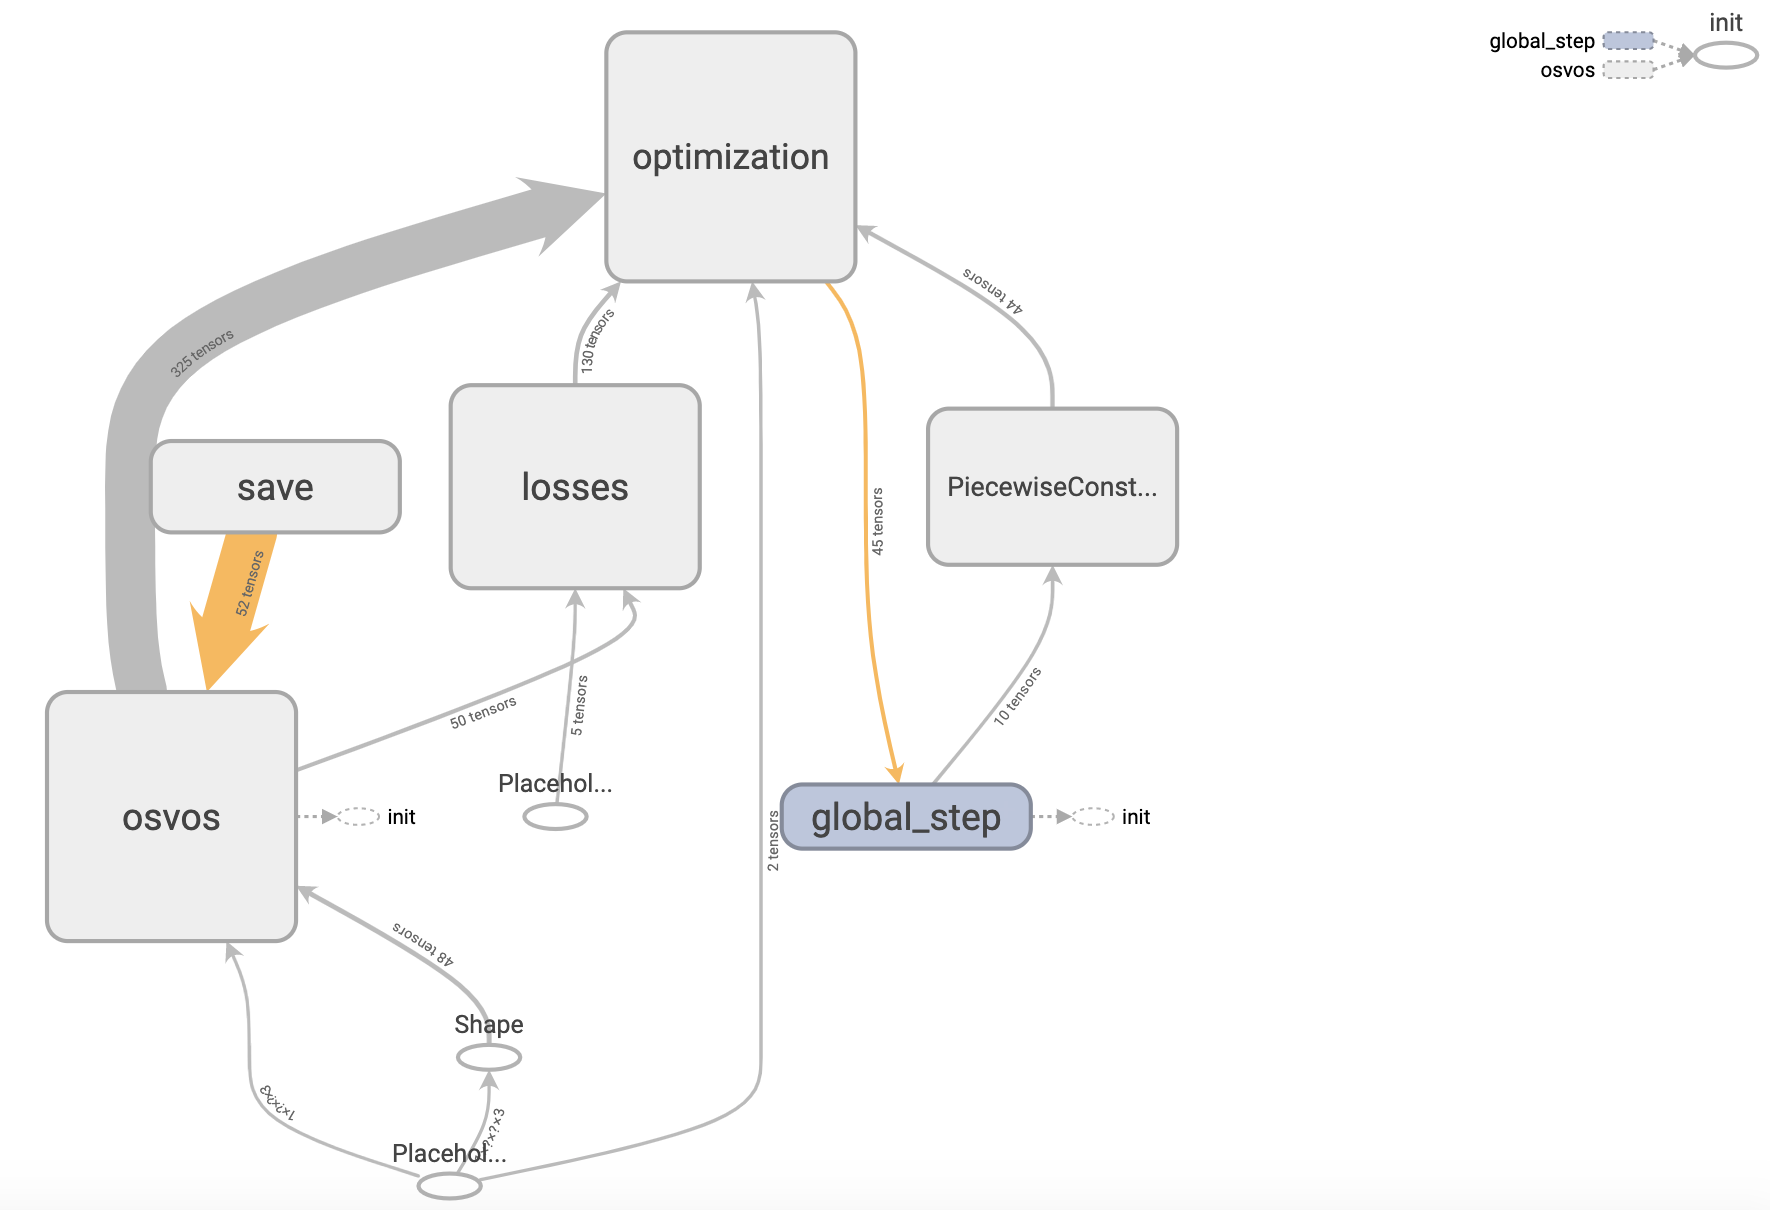

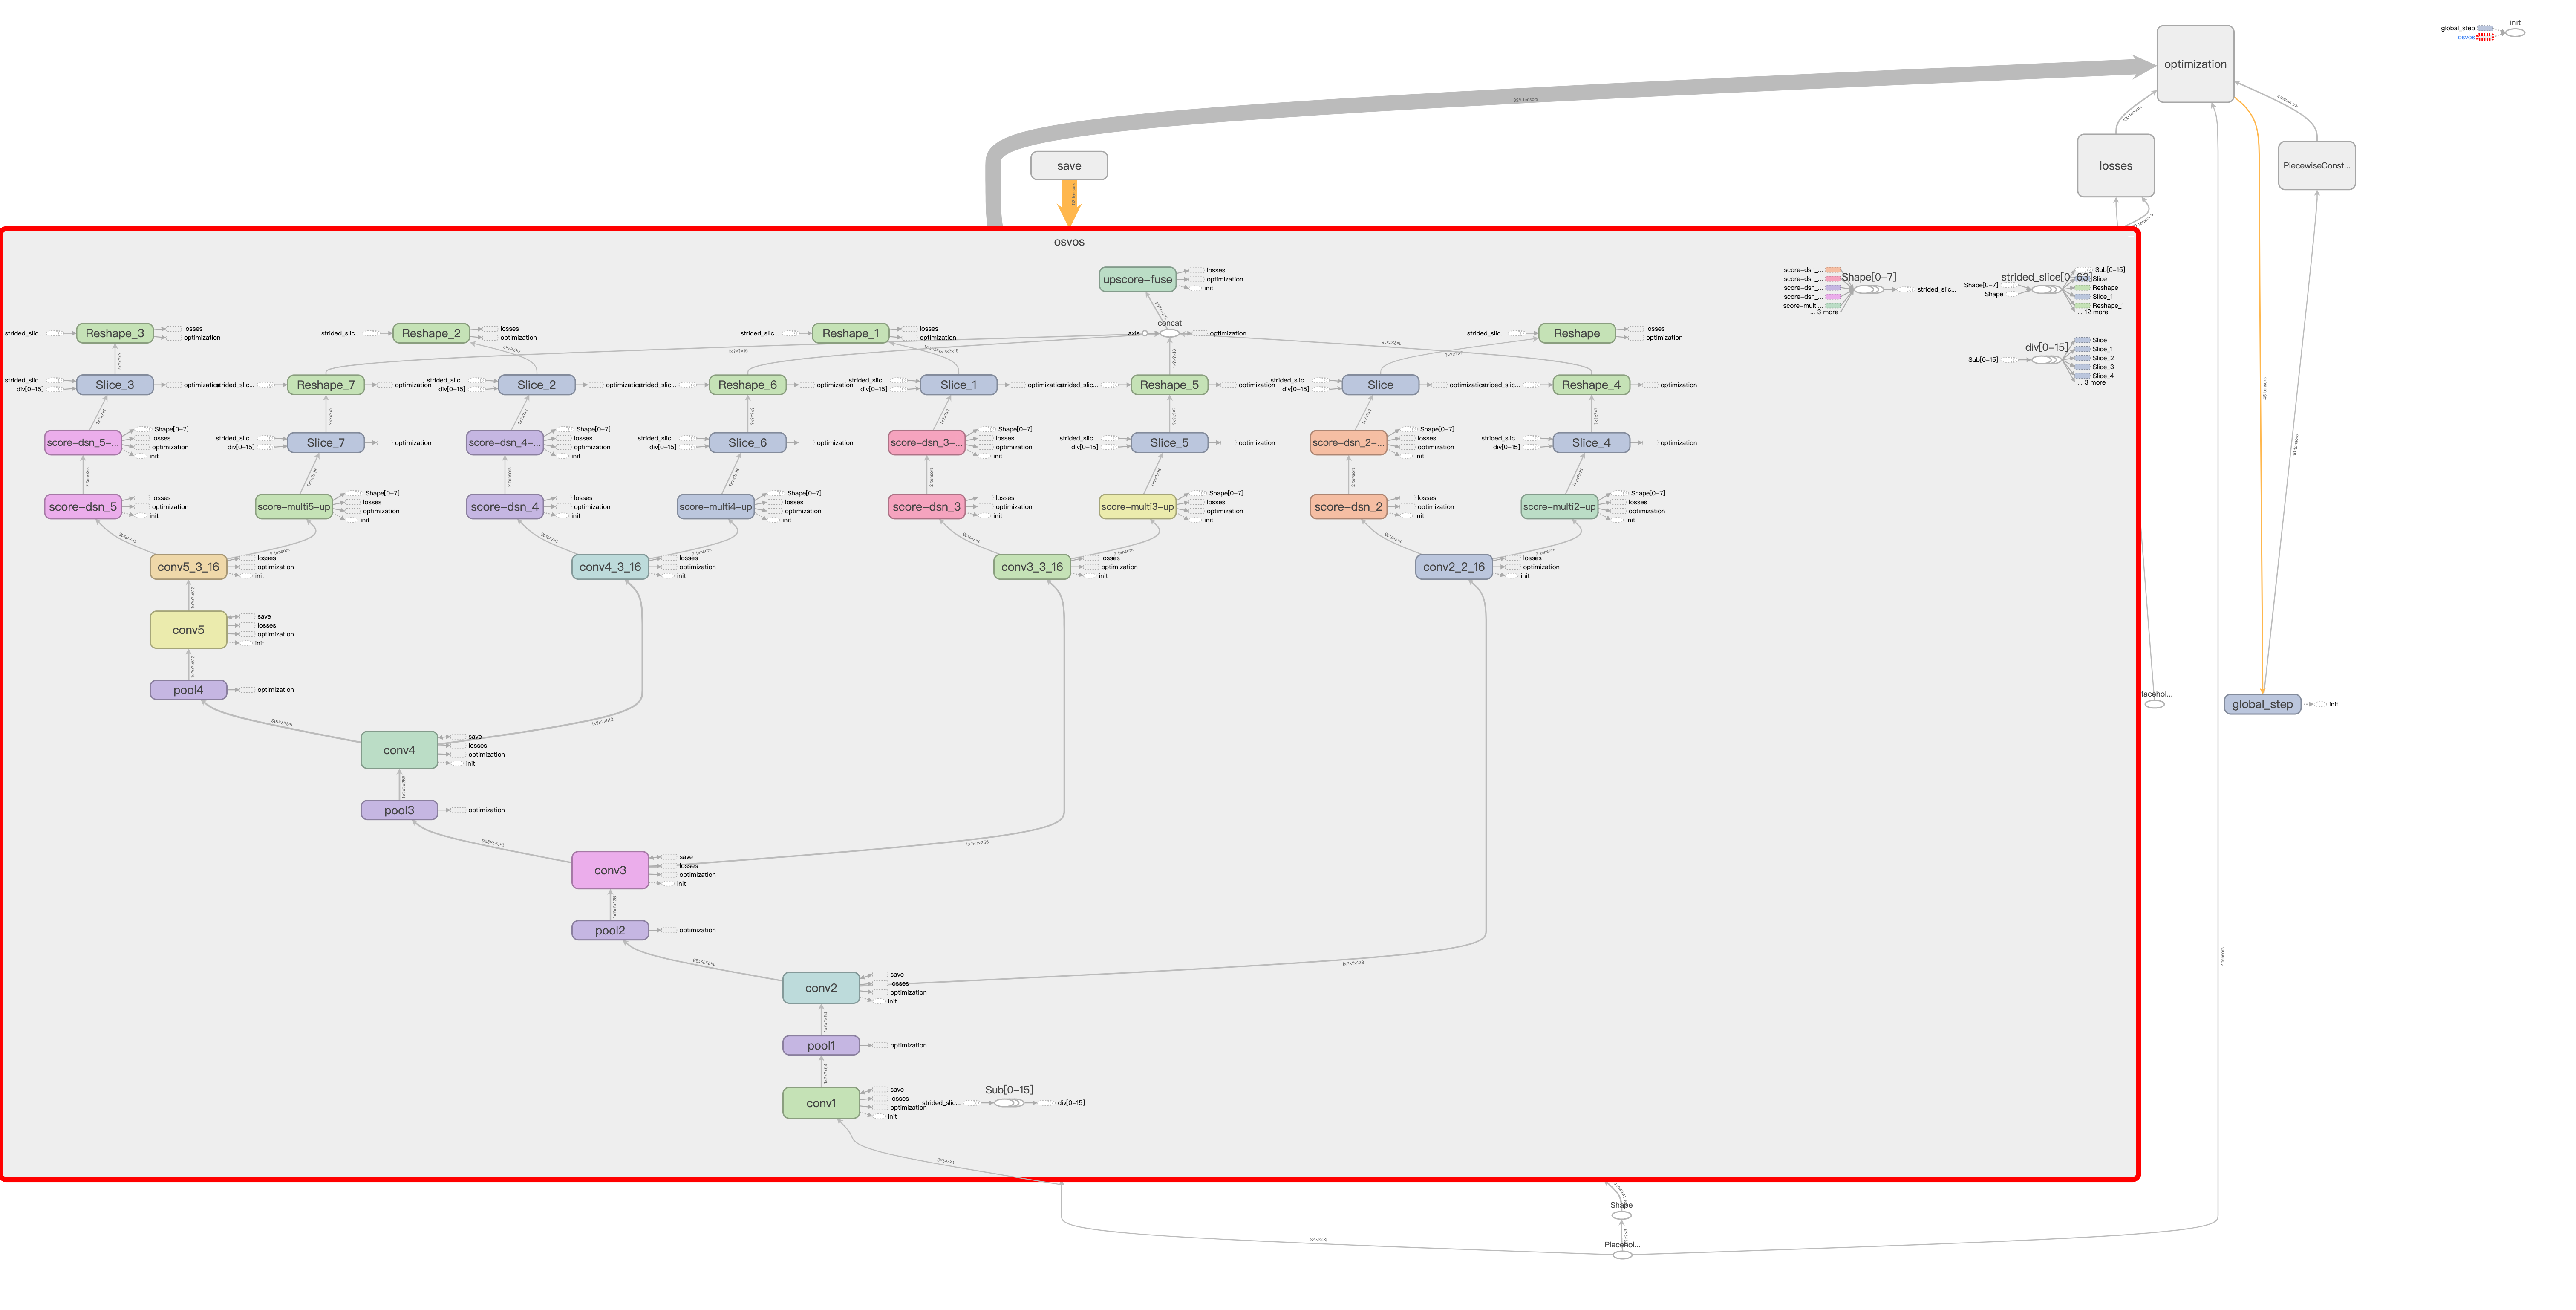

### Loss

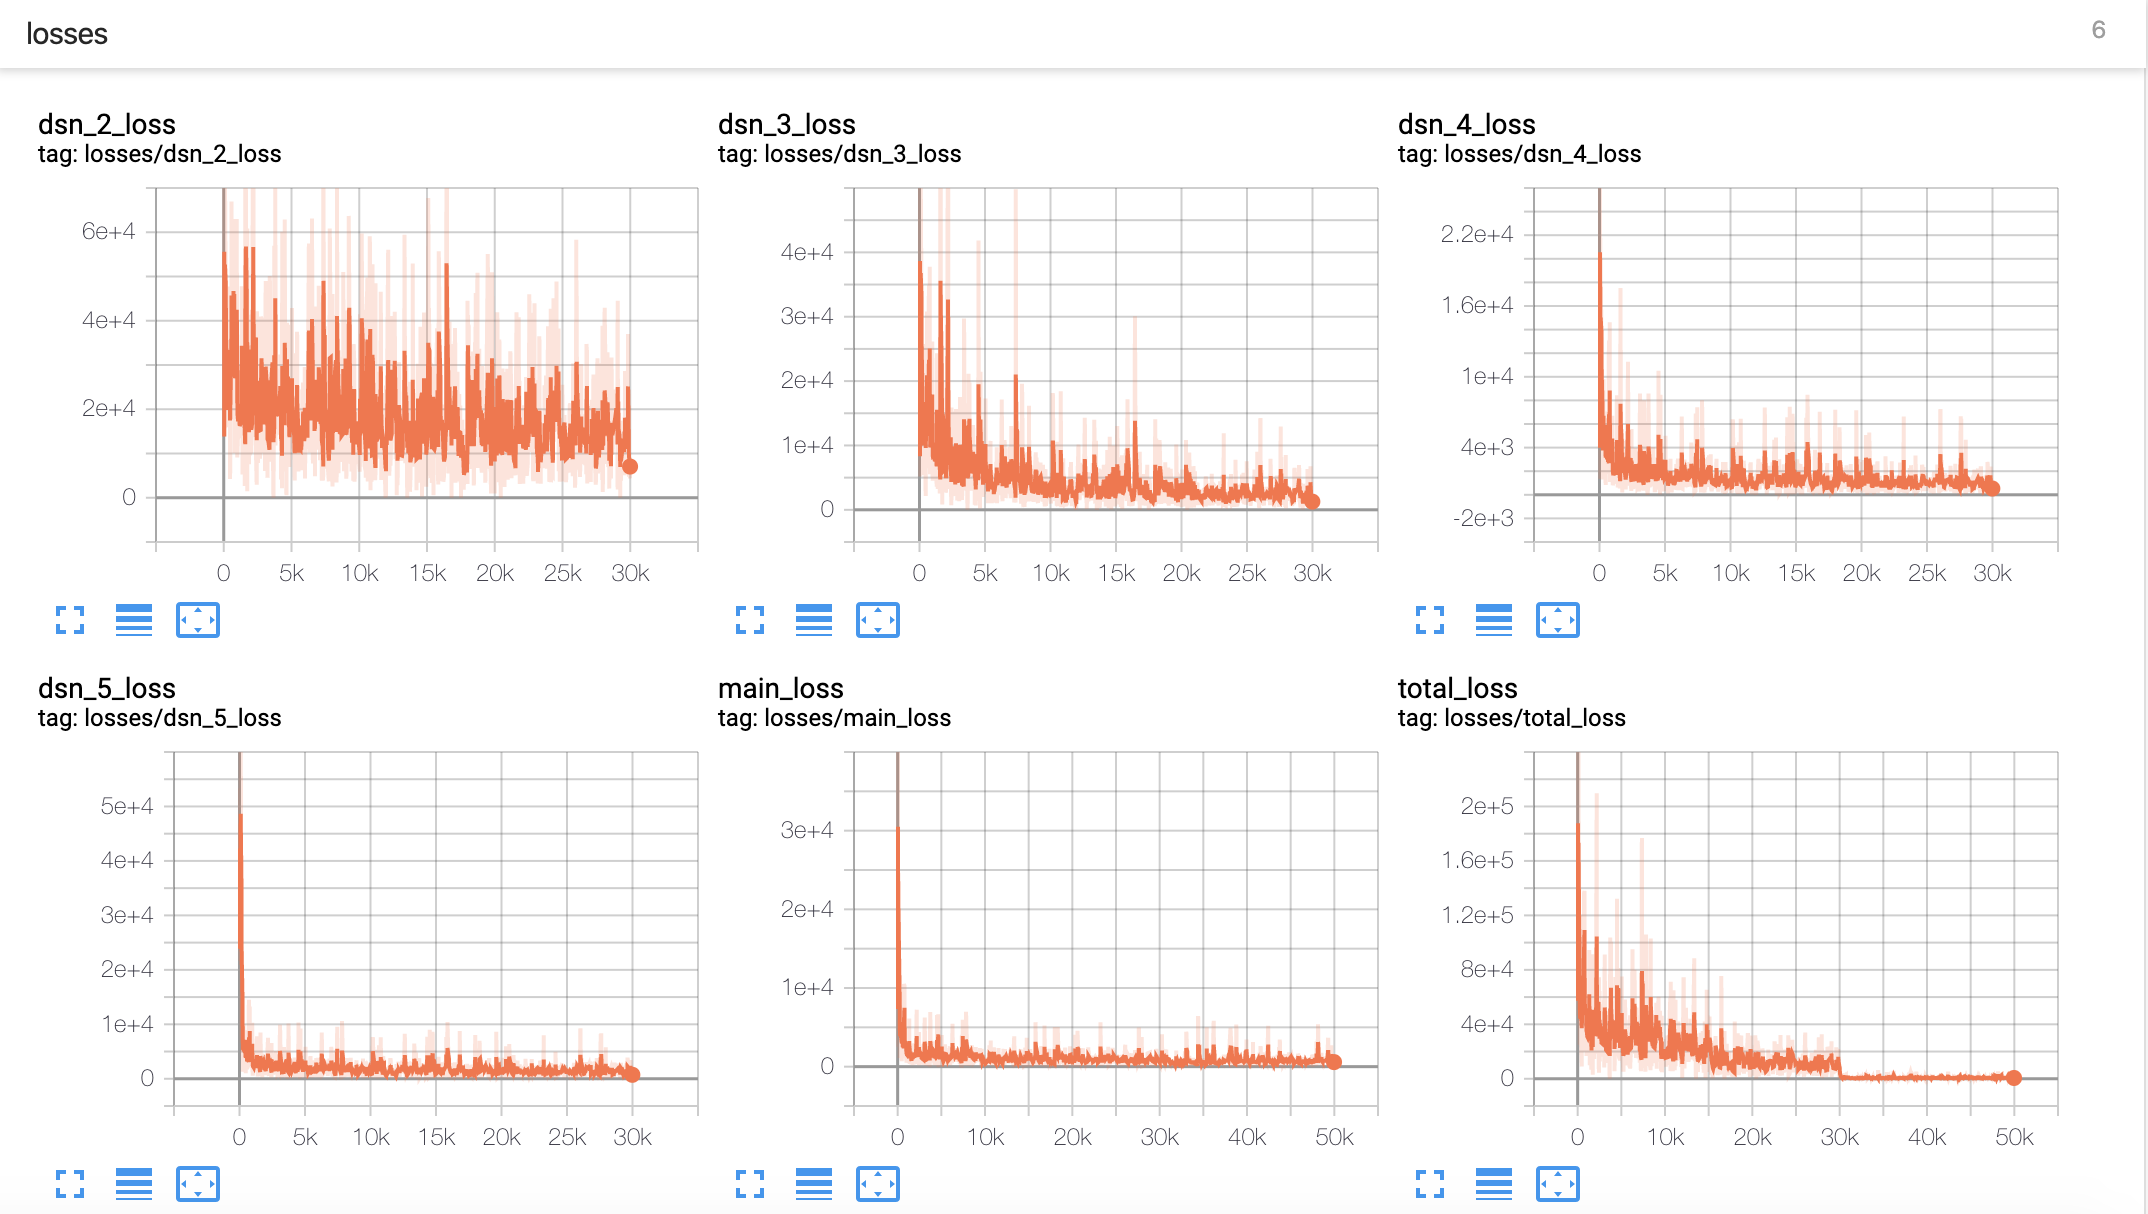